In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
np.random.seed(42)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 20.0, 15)
X = x.reshape(15, 1)
X

array([[ 0.        ],
       [ 1.42857143],
       [ 2.85714286],
       [ 4.28571429],
       [ 5.71428571],
       [ 7.14285714],
       [ 8.57142857],
       [10.        ],
       [11.42857143],
       [12.85714286],
       [14.28571429],
       [15.71428571],
       [17.14285714],
       [18.57142857],
       [20.        ]])

In [6]:
m = LinearRegression()
m.fit(X, y)
ypred = m.predict(X)

In [11]:
df = pd.DataFrame({
    'x': x,
    'y': y
})

In [12]:
df['x²'] = df['x']**2
df.head()

,x,y,x²
0,0.000000,9.934283,0.000000
1,1.428571,4.377571,2.040816
2,2.857143,27.239485,8.163265
3,4.285714,51.889169,18.367347
4,5.714286,23.888361,32.653061


In [19]:
polynomial_transformer = PolynomialFeatures(degree=9, include_bias=False)
polynomial_features = pd.DataFrame(polynomial_transformer.fit_transform(X),
                                   columns=polynomial_transformer.get_feature_names())
polynomial_features

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.428571,2.040816,2.915452,4.164931,5.949902e+00,8.499860e+00,1.214266e+01,1.734665e+01,2.478093e+01
2,2.857143,8.163265,23.323615,66.638900,1.903969e+02,5.439910e+02,1.554260e+03,4.440743e+03,1.268784e+04
3,4.285714,18.367347,78.717201,337.359434,1.445826e+03,6.196398e+03,2.655599e+04,1.138114e+05,4.877631e+05
4,5.714286,32.653061,186.588921,1066.222407,6.092699e+03,3.481543e+04,1.989453e+05,1.136830e+06,6.496173e+06
5,7.142857,51.020408,364.431487,2603.082049,1.859344e+04,1.328103e+05,9.486451e+05,6.776036e+06,4.840026e+07
6,8.571429,73.469388,629.737609,5397.750937,4.626644e+04,3.965695e+05,3.399167e+06,2.913572e+07,2.497347e+08
7,10.000000,100.000000,1000.000000,10000.000000,1.000000e+05,1.000000e+06,1.000000e+07,1.000000e+08,1.000000e+09
8,11.428571,130.612245,1492.711370,17059.558517,1.949664e+05,2.228187e+06,2.546500e+07,2.910285e+08,3.326040e+09
9,12.857143,165.306122,2125.364431,27326.114119,3.513358e+05,4.517174e+06,5.807795e+07,7.467165e+08,9.600641e+09


In [26]:
m.fit(polynomial_features, y)
ypred_poly = m.predict(polynomial_features)

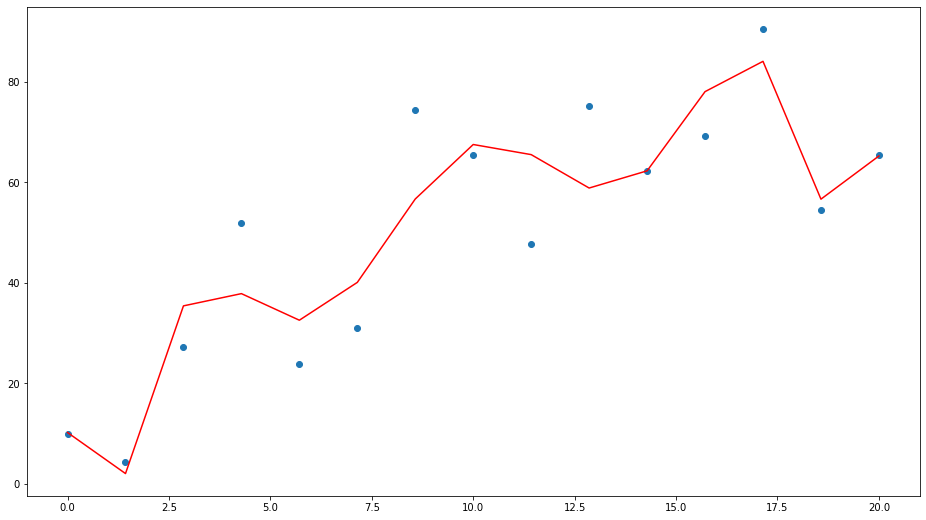

In [27]:
plt.figure(figsize=(16,9))

plt.scatter(X, y)
plt.plot(X, ypred_poly, color='r')